## MCP9808 Temperature Sensor  
The MCP9808 is a digitial temperature sensor with an accuracy of +/-0.25 C within a working range of -40 to 125 C and a maximum precision of +0.0625 C.  

Manufacturer Link: https://www.microchip.com/wwwproducts/en/en556182

Breakout Board Used: https://www.adafruit.com/product/1782

In [1]:
import matplotlib.pyplot as plt

from meerkat import mcp9808, parser

Select I2C bus and instance device class.  Note I2C bus is 1 on Raspberry Pi.

In [2]:
dev = mcp9808.MCP9808(bus_n=1)

#### Configuration

In [3]:
dev.print_status()

Configuration Register: None
Upper Temperature: None
Lower Temperature: None
Critical Temperature: None
Manufacturer: 84
Device ID: 4
Device Revision: 0


#### Measurement

In [4]:
dev.get_temp()

20.5

In [5]:
# get method, list with description and sample number
dev.get(description='test_1', n=5)

[['test_1', 1, 20.5],
 ['test_1', 2, 20.5],
 ['test_1', 3, 20.5],
 ['test_1', 4, 20.5],
 ['test_1', 5, 20.5]]

#### JSON Data Publishing  

In [6]:
# lower metadata interval from a default of once every 10 samples
dev.json_writer.metadata_interval = 3

In [7]:
# writing method with description and sample number
dev.publish(description='test_2', n=5)

['{"description": "test_2", "sample_n": 0, "temp_C": 20.5, "std_time_ms": "2020-12-10 18:46:26.039087"}',
 '{"description": "test_2", "sample_n": 1, "temp_C": 20.5, "std_time_ms": "2020-12-10 18:46:26.039907"}',
 '{"description": "test_2", "sample_n": 2, "temp_C": 20.5, "std_time_ms": "2020-12-10 18:46:26.040653", "encoding": "utf-8", "format": "text/json", "standard": "RFC 8259", "line_terminator": "\\n", "quote_char": "\\"", "double_quote": true, "escape_char": "\\\\", "null_sequence": "NA", "comment": "#", "metadata": {"name": "mcp9808", "urls": "https://www.microchip.com/datasheet/MCP9808", "manufacturer": "Adafruit Industries & Microchip Tech", "header": ["description", "sample_n", "temp_C"], "dtype": ["str", "int", "float"], "units": [null, "count", "degrees Celcius"], "accuracy": [null, 1, "+/- 0.5"], "precision": [null, 1, "0.0625 max"], "bus_n": 1, "bus_addr": 24, "description": "Microchip Tech digital temperature sensor"}, "time_source": "std_time_ms", "time_format": "%Y-%m-%

#### JSON Writer Output  

In [8]:
# default writer format is CSV, switch to JSON
dev.writer_output = 'json'

In [9]:
# writer method with description and sample number
dev.write(description='test_3', n=30)

In [10]:
dev.json_writer.path

'2020_12_10_18_46_26_mcp9808.jsontxt'

In [11]:
with open(dev.json_writer.path, 'r') as f:
    for _ in range(4):
        print(f.readline().strip())

{"description": "test_3", "sample_n": 0, "temp_C": 20.5, "std_time_ms": "2020-12-10 18:46:26.076422"}
{"description": "test_3", "sample_n": 1, "temp_C": 20.5, "std_time_ms": "2020-12-10 18:46:26.077534"}
{"description": "test_3", "sample_n": 2, "temp_C": 20.5, "std_time_ms": "2020-12-10 18:46:26.078498", "encoding": "utf-8", "format": "text/json", "standard": "RFC 8259", "line_terminator": "\n", "quote_char": "\"", "double_quote": true, "escape_char": "\\", "null_sequence": "NA", "comment": "#", "metadata": {"name": "mcp9808", "urls": "https://www.microchip.com/datasheet/MCP9808", "manufacturer": "Adafruit Industries & Microchip Tech", "header": ["description", "sample_n", "temp_C"], "dtype": ["str", "int", "float"], "units": [null, "count", "degrees Celcius"], "accuracy": [null, 1, "+/- 0.5"], "precision": [null, 1, "0.0625 max"], "bus_n": 1, "bus_addr": 24, "description": "Microchip Tech digital temperature sensor"}, "path": "2020_12_10_18_46_26_mcp9808.jsontxt", "time_source": "std_

#### CSV Writer Output

In [12]:
# switch back to CSV format
dev.writer_output = 'csv'

In [13]:
# writer method with description and sample number
dev.write(description='test_4', n=30)

In [14]:
dev.csv_writer.path

'2020_12_10_18_46_26_mcp9808.csv'

In [15]:
# load .csv data written with dev.write
m, df = parser.csv_resource(dev.csv_writer.path)

#### Metadata in the CSV

In [16]:
m

{'case_sensitive_header': False,
 'comment': '#',
 'delimiter': ',',
 'double_quote': True,
 'encoding': 'utf-8',
 'escape_char': '\\',
 'format': 'text/csv',
 'line_terminator': '\n',
 'metadata': {'accuracy': [None, 1, '+/- 0.5'],
  'bus_addr': 24,
  'bus_n': 1,
  'description': 'Microchip Tech digital temperature sensor',
  'dtype': ['str', 'int', 'float'],
  'header': ['description', 'sample_n', 'temp_C'],
  'manufacturer': 'Adafruit Industries & Microchip Tech',
  'name': 'mcp9808',
  'precision': [None, 1, '0.0625 max'],
  'units': [None, 'count', 'degrees Celcius'],
  'urls': 'https://www.microchip.com/datasheet/MCP9808'},
 'null_sequence': 'NA',
 'path': '2020_12_10_18_46_26_mcp9808.csv',
 'quote_char': '"',
 'skip_initial_space': True,
 'skip_lines': 1,
 'standard': 'Follow RFC 4180',
 'time_format': '%Y-%m-%d %H:%M:%S.%f',
 'time_source': 'std_time_ms'}

#### Parsed CSV data

In [17]:
df.head()

,std_time_ms,description,sample_n,temp_C,datetime64_ns
0,2020-12-10 18:46:26.197318,test_4,0,20.5,2020-12-10 18:46:26.197318
1,2020-12-10 18:46:26.198144,test_4,1,20.5,2020-12-10 18:46:26.198144
2,2020-12-10 18:46:26.198930,test_4,2,20.5,2020-12-10 18:46:26.198930
3,2020-12-10 18:46:26.199746,test_4,3,20.5,2020-12-10 18:46:26.199746
4,2020-12-10 18:46:26.206926,test_4,4,20.5,2020-12-10 18:46:26.206926


In [18]:
# Pandas 0.24.1 hack
df.datetime64_ns = df.datetime64_ns.dt.tz_localize('UTC')

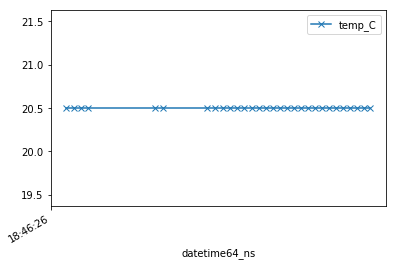

In [19]:
df[["datetime64_ns", "temp_C"]].plot(x="datetime64_ns", style='-x');

In [20]:
dt = df.datetime64_ns[len(df)-1]-df.datetime64_ns[0]
dtt = dt.seconds + dt.microseconds / 10**6
print('Sample Rate: {:.4f} Hz'.format(len(df)/dtt))

Sample Rate: 913.6314 Hz
